In [115]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import random

In [116]:
N_SAMPLES = 1_000_000
key = jax.random.key(1)

In [117]:
end2end_prob = 0.05**2

In [118]:
def mk_prob_estimate(trials: int, n_milestones: int):
    
    milestone_prob = end2end_prob ** (1/n_milestones)
    
    # Each entry represents how many trials were successful in a given milestone
    prob_estimate = jax.random.binomial(key, n=trials, p=milestone_prob, shape=(n_milestones, N_SAMPLES,))/trials

    # Each entry represents how many tirals were sucessful in a given run
    prob_estimate = prob_estimate.prod(axis=0)

    return prob_estimate


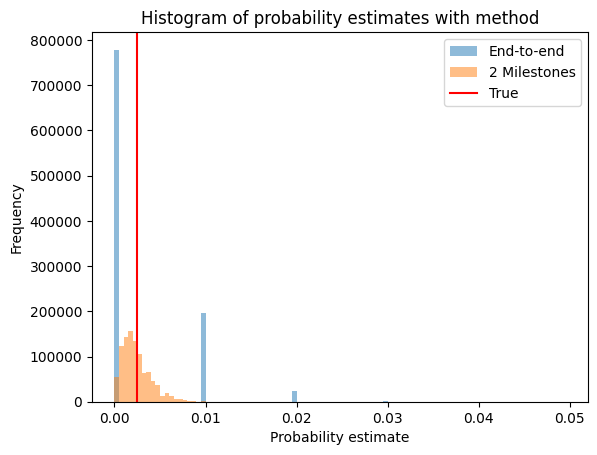

In [119]:
# plot the range of probability estimates
n_bins = 100
min_prob = 0
max_prob = 0.05
binwidth = (max_prob - min_prob) / n_bins
bins = jnp.arange(min_prob, max_prob, binwidth)

plt.title("Histogram of probability estimates with method")


plt.hist(mk_prob_estimate(100, 1), bins=bins, label="End-to-end", alpha=0.5)
plt.hist(mk_prob_estimate(100, 2), bins=bins, label="2 Milestones", alpha=0.5)


plt.xlabel("Probability estimate")
plt.ylabel("Frequency")
# plot the true probability
plt.axvline(end2end_prob, color='r', label="True")
plt.legend()
plt.show()

# # print bias and variance of estimates
# bias = jnp.mean(end2end_prob_estimate) - end2end_prob
# variance = jnp.var(end2end_prob_estimate)

# print(f"bias: {bias}")
# print(f"variance: {variance}")